# Lab 3 Assignment: Exploratory Data Analysis (EDA)
## Project: Student Health Data Analysis
**Objective:** To understand the patterns, distributions, and relationships within the student health dataset before building any ML models.

## 1. Data Loading and Environment Setup
In this step, we import the necessary libraries (**Pandas, Numpy, Matplotlib, Seaborn**) and load the `student_health_data.csv` dataset. We also define custom column names to ensure the data is structured correctly.

In [37]:
# Import essential libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visualization style
sns.set_theme(style="whitegrid")

# Define professional column names for the dataset
column_names = [
    'Student_ID', 'Age', 'Gender', 'Heart_Rate', 'BP_Systolic', 
    'BP_Diastolic', 'Stress_Biosensor', 'Stress_Self', 'Activity', 
    'Sleep', 'Mood', 'Study_Hours', 'Project_Hours', 'Risk_Level', 
    'Family_Members'
]

# Load the dataset and skip the corrupted header row
# Using specific column names and limiting to the first 15 columns
df = pd.read_csv("student_health_data.csv", sep=',', skiprows=1, names=column_names, usecols=range(15))

# Preview the first 5 rows of the dataframe
df.head()

,Student_ID,Age,Gender,Heart_Rate,BP_Systolic,BP_Diastolic,Stress_Biosensor,Stress_Self,Activity,Sleep,Mood,Study_Hours,Project_Hours,Risk_Level,Family_Members
0,1,24,M,50.663217,122.173015,84.419860,3.137350,9.028669,High,Moderate,Happy,34.520973,16.800956,Moderate,2
1,2,21,F,57.926042,110.778407,75.696145,3.699078,5.819697,Moderate,Good,Stressed,16.763846,15.791154,Moderate,1
2,3,22,M,59.294219,109.375673,83.803814,6.785156,5.892360,Low,Moderate,Happy,44.203798,25.678437,Moderate,12
3,4,24,M,76.826232,125.142227,78.091587,6.408509,6.884001,High,Poor,Happy,21.776645,20.808391,High,9
4,5,20,M,68.342769,107.515592,80.674937,7.264719,4.483450,Moderate,Poor,Happy,8.964999,15.194045,Moderate,7


## 2. Data Cleaning and Quality Audit
Before analysis, we must ensure data integrity. This step involves checking for **missing values** and **duplicate rows** to decide if any cleaning or data imputation is required.

In [46]:
# 1. Check for missing values
print("Data Quality Audit - Missing Values:")
print(df.isna().sum())

# 2. Identify duplicate entries
print("\nDuplicate Rows Found:", df.duplicated().sum())

# 3. Check data shape (Rows and Columns) - Like the Doctor's style
print("\nShape (rows, columns):", df.shape)
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

# 4. Review data types and non-null counts
print("\nData Structure Info:")
df.info()

Data Quality Audit - Missing Values:
Student_ID          0
Age                 0
Gender              0
Heart_Rate          0
BP_Systolic         0
BP_Diastolic        0
Stress_Biosensor    0
Stress_Self         0
Activity            0
Sleep               0
Mood                0
Study_Hours         0
Project_Hours       0
Risk_Level          0
Family_Members      0
dtype: int64

Duplicate Rows Found: 0

Shape (rows, columns): (1000, 15)
Number of rows: 1000
Number of columns: 15

Data Structure Info:
<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Student_ID        1000 non-null   int64  
 1   Age               1000 non-null   int64  
 2   Gender            1000 non-null   str    
 3   Heart_Rate        1000 non-null   float64
 4   BP_Systolic       1000 non-null   float64
 5   BP_Diastolic      1000 non-null   float64
 6   Stress_Biosensor  1

## 3. Descriptive Statistical Summary
We generate a statistical overview of the dataset. This helps us understand the **mean, median, and spread** of student health metrics like Heart Rate, Age, and Study Hours.

In [39]:
# Generate a comprehensive statistical summary for all features
# 'include=all' ensures both numerical and categorical data are summarized
df.describe(include='all')

,Student_ID,Age,Gender,Heart_Rate,BP_Systolic,BP_Diastolic,Stress_Biosensor,Stress_Self,Activity,Sleep,Mood,Study_Hours,Project_Hours,Risk_Level,Family_Members
count,1000.000000,1000.0000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.000000,1000.000000,1000,1000.000000
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,3,3,3,NaN,NaN,3,NaN
top,NaN,NaN,M,NaN,NaN,NaN,NaN,NaN,Moderate,Good,Neutral,NaN,NaN,Moderate,NaN
freq,NaN,NaN,519,NaN,NaN,NaN,NaN,NaN,491,473,415,NaN,NaN,672,NaN
mean,500.500000,20.9600,NaN,70.101863,119.835380,79.854756,5.483909,5.361601,NaN,NaN,NaN,30.227037,14.887368,NaN,7.463000
std,288.819436,2.0036,NaN,9.544663,14.604307,9.641699,2.596108,2.550382,NaN,NaN,NaN,10.341060,4.888624,NaN,4.034465
min,1.000000,18.0000,NaN,50.000000,90.000000,60.000000,1.008491,1.002186,NaN,NaN,NaN,5.000000,0.000000,NaN,1.000000
25%,250.750000,19.0000,NaN,63.347970,109.386868,73.115420,3.270567,3.172409,NaN,NaN,NaN,23.262704,11.573503,NaN,4.000000
50%,500.500000,21.0000,NaN,70.330916,120.051654,79.651738,5.368891,5.234889,NaN,NaN,NaN,30.432767,14.765873,NaN,7.000000
75%,750.250000,23.0000,NaN,76.425149,130.397799,86.535640,7.674233,7.471178,NaN,NaN,NaN,37.245193,18.159167,NaN,11.000000


## 4. Categorical Analysis using Groupby
Following the lab structure, we analyze the average stress levels across different student moods to identify patterns.

In [40]:
# Grouping data to calculate the mean stress level for each mood category
mood_analysis = df.groupby('Mood')['Stress_Self'].mean().sort_values(ascending=False)

# Display the grouped data
print("Average Stress Level by Mood Group:")
print(mood_analysis)

Average Stress Level by Mood Group:
Mood
Happy       5.453529
Stressed    5.357719
Neutral     5.274956
Name: Stress_Self, dtype: float64


## 5. Visualizing Categorical Data (Bar Chart)
A bar chart helps in comparing the average stress levels visually across different moods.

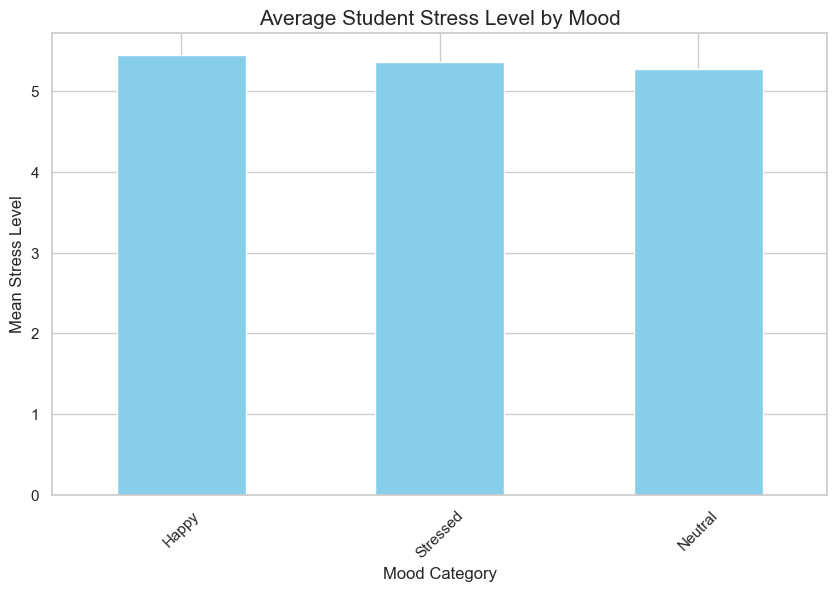

In [41]:
# Plotting the grouped data as a bar chart
plt.figure(figsize=(10, 6))
mood_analysis.plot(kind='bar', color='skyblue')

# Professional labeling
plt.title("Average Student Stress Level by Mood", fontsize=15)
plt.ylabel("Mean Stress Level", fontsize=12)
plt.xlabel("Mood Category", fontsize=12)
plt.xticks(rotation=45)
plt.show()

## 6. Univariate Analysis: Distribution of Heart Rate
We visualize the distribution of **Heart Rate** using a Histogram to identify the most common ranges among students.

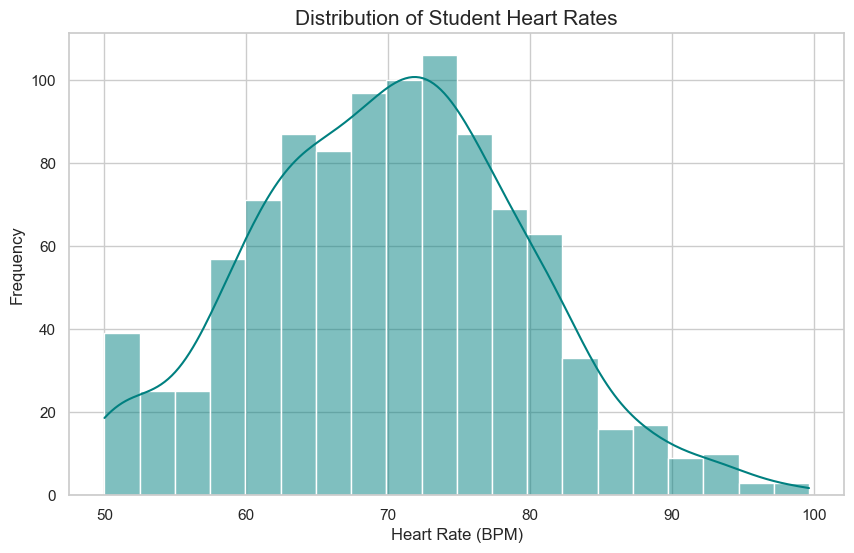

In [42]:
# Visualize the distribution of Heart Rate using a Histogram with a Kernel Density Estimate (KDE)
plt.figure(figsize=(10, 6))
sns.histplot(df['Heart_Rate'], bins=20, kde=True, color='teal')

# Add descriptive titles and labels
plt.title("Distribution of Student Heart Rates", fontsize=15)
plt.xlabel("Heart Rate (BPM)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

## 7. Bivariate Analysis: Study Hours vs. Stress Level
In this section, we explore how academic load impacts mental well-being by visualizing Study Hours and Stress Levels.

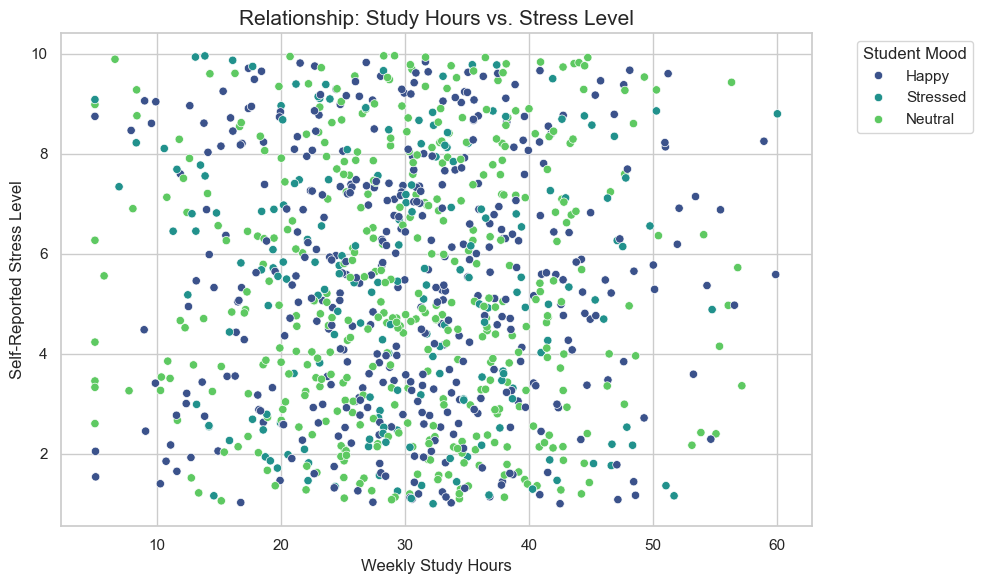

In [43]:
# Analyze the relationship between Study Hours and Stress Levels
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Study_Hours', y='Stress_Self', data=df, hue='Mood', palette='viridis')

# Finalize the plot with clear labeling
plt.title("Relationship: Study Hours vs. Stress Level", fontsize=15)
plt.xlabel("Weekly Study Hours", fontsize=12)
plt.ylabel("Self-Reported Stress Level", fontsize=12)
plt.legend(title='Student Mood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 8. Multivariate Analysis: Correlation Heatmap
As a conclusion to our EDA, we use a Heatmap to identify which health and academic factors are most strongly related.

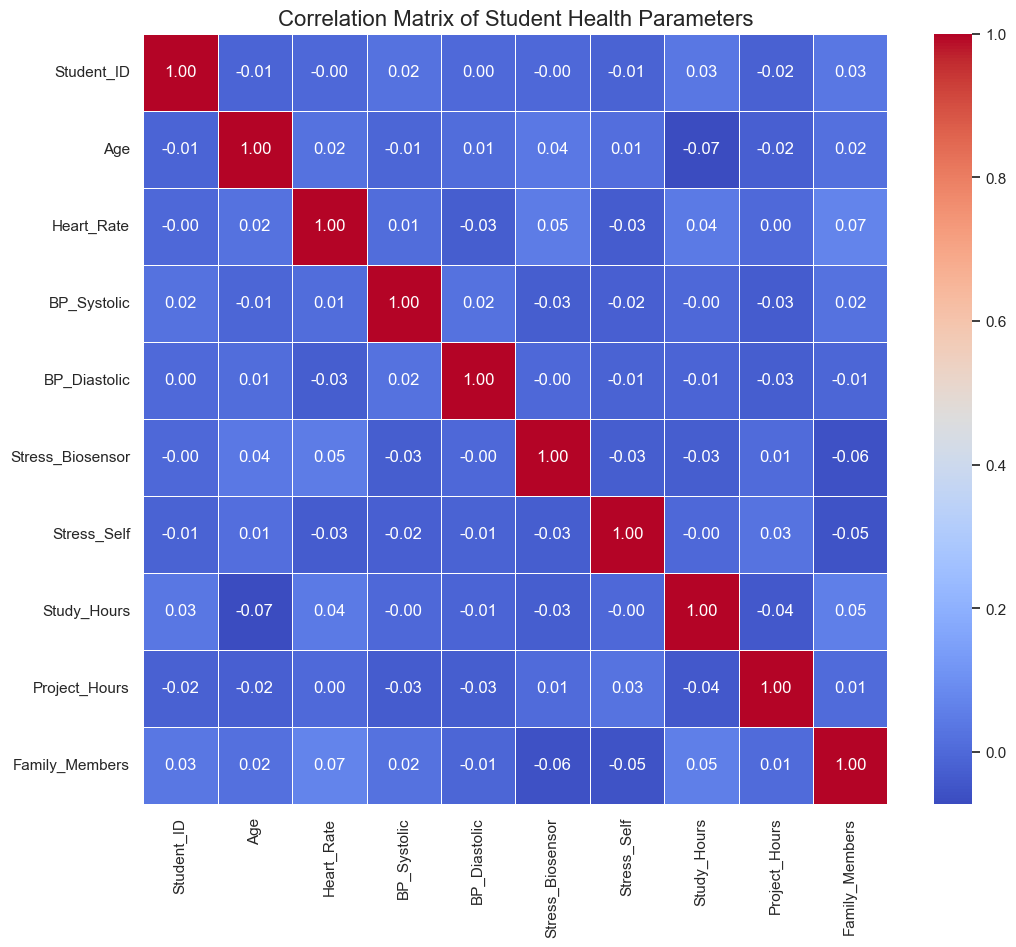

In [45]:
# Select only numerical features for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

# Compute and visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Adding a professional title
plt.title("Correlation Matrix of Student Health Parameters", fontsize=16)
plt.show()